In [1]:
# data analysis and wrangling
import numpy as np
import pandas as pd
import json

# data standardization
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# deep learning
from keras import models
from keras import layers
from tensorflow.keras.utils import to_categorical

In [2]:
train_df = pd.read_csv("preprocessed_train.csv", encoding='euc-kr')

In [3]:
train_df

,분석데이터,label,numstrings,avlength,printables,entropy,paths,urls,registry,MZ,...,dist_86,dist_87,dist_88,dist_89,dist_90,dist_91,dist_92,dist_93,dist_94,dist_95
0,1,1,144,12.298611,1771,5.356616,0,0,0,1,...,10,4,10,9,4,0,1,0,0,0
1,2,1,804,9.580846,7703,6.063542,0,0,0,6,...,43,121,84,78,47,36,40,45,27,36
2,3,0,2205,12.736054,28083,6.107050,9,0,0,6,...,326,268,239,286,199,148,154,37,48,36
3,4,0,2602,10.288240,26770,5.373013,8,0,0,1,...,336,230,206,245,76,0,26,702,1,5
4,5,1,8980,23.252339,208806,5.775223,0,28,16,3,...,731,882,1171,1010,322,64,327,84,75,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,1,2018,13.938057,28127,5.940442,0,70,0,11,...,246,186,206,235,88,33,81,58,61,72
9996,9997,0,1105,16.437104,18163,5.766962,0,11,0,3,...,199,57,134,123,20,25,28,25,41,13
9997,9998,0,4,58.500000,234,3.811827,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9998,9999,1,3312,24.939312,82599,5.834730,0,39,0,8,...,438,985,806,851,113,123,181,100,75,86


In [4]:
train_df = train_df.drop(columns=['분석데이터'], axis=1)

In [5]:
train_images = train_df[:8000]
train_labels = train_images['label']

test_images = train_df[8000:]
test_labels = test_images['label']


train_images = train_images.drop(columns=['label'], axis=1)
test_images = test_images.drop(columns=['label'], axis=1)

In [6]:
train_images.shape

(8000, 616)

In [7]:
test_images.shape

(2000, 616)

In [8]:
train_labels.shape

(8000,)

In [9]:
test_labels.shape

(2000,)

## 데이터 정형화

In [10]:
train_images.max()

numstrings    3.786600e+05
avlength      5.447628e+04
printables    2.179051e+07
entropy       6.584870e+00
paths         9.897000e+03
                  ...     
dist_91       8.483400e+04
dist_92       3.760200e+04
dist_93       5.148000e+04
dist_94       1.326000e+04
dist_95       1.492800e+04
Length: 616, dtype: float64

In [11]:
train_images.columns

Index(['numstrings', 'avlength', 'printables', 'entropy', 'paths', 'urls',
       'registry', 'MZ', 'a_0', 'a_1',
       ...
       'dist_86', 'dist_87', 'dist_88', 'dist_89', 'dist_90', 'dist_91',
       'dist_92', 'dist_93', 'dist_94', 'dist_95'],
      dtype='object', length=616)

In [12]:
# MinMax는 이상치에 취약하다

In [13]:
train_images = train_images.to_numpy()

In [14]:
scaler = RobustScaler()

In [15]:
scaler.fit(train_images)
train_images = scaler.transform(train_images)

In [16]:
scaler.fit(test_images)
test_images = scaler.transform(test_images)

In [17]:
train_images

array([[-0.32009081, -0.02121233, -0.25814729, ..., -0.23474178,
        -0.23757576, -0.2173913 ],
       [-0.22020431, -0.28185204, -0.19004127, ..., -0.02347418,
        -0.10666667, -0.06086957],
       [-0.00817253,  0.02073946,  0.043944  , ..., -0.06103286,
        -0.00484848, -0.06086957],
       ...,
       [ 0.45342414, -0.5670465 ,  0.1201442 , ...,  0.61032864,
         0.64      ,  0.62173913],
       [ 1.41642073, -0.63648936,  0.50623138, ...,  2.5915493 ,
         2.79272727,  2.3826087 ],
       [-0.24865683,  0.24361721, -0.17196999, ..., -0.17370892,
        -0.15515152, -0.13478261]])

In [18]:
test_images

array([[ 0.23685977,  0.22291115,  0.38236502, ..., -0.04379562,
        -0.00715137,  1.10590858],
       [-0.18583896,  0.20718725, -0.13460351, ..., -0.18491484,
        -0.15971395, -0.13377926],
       [ 2.32097303, -0.64446215,  0.95546954, ...,  2.92457421,
         4.31227652,  2.9386845 ],
       ...,
       [-0.31884058,  4.38159605, -0.29263797, ..., -0.22871046,
        -0.21215733, -0.20512821],
       [ 0.20368835,  1.18169206,  0.77271713, ...,  0.25790754,
         0.1454112 ,  0.17837235],
       [-0.21600916, -0.6166866 , -0.24417217, ..., -0.11678832,
        -0.08820024, -0.06243032]])

In [19]:
test_images[1].shape

(616,)

### resize array for image

## deep learning layer

In [20]:
network = models.Sequential()
network.add(layers.Dense(100, activation='relu', input_shape=(616,)))
network.add(layers.Dense(1, activation='sigmoid'))

In [21]:
network.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

In [22]:
#train_labels = to_categorical(train_labels)
#test_labels = to_categorical(test_labels)

In [23]:
history = network.fit(train_images, train_labels, epochs=20, batch_size=16, validation_data=(test_images, test_labels))

Epoch 1/20
500/500 [==============================] - 2s 3ms/step - loss: 39.0830 - accuracy: 0.6990 - val_loss: 12.9894 - val_accuracy: 0.7655
Epoch 2/20
500/500 [==============================] - 1s 2ms/step - loss: 34.6802 - accuracy: 0.7575 - val_loss: 18.8367 - val_accuracy: 0.7910
Epoch 3/20
500/500 [==============================] - 1s 2ms/step - loss: 21.0103 - accuracy: 0.7835 - val_loss: 45.0380 - val_accuracy: 0.7805
Epoch 4/20
500/500 [==============================] - 1s 2ms/step - loss: 21.6148 - accuracy: 0.7996 - val_loss: 37.7034 - val_accuracy: 0.7895
Epoch 5/20
500/500 [==============================] - 1s 2ms/step - loss: 28.2226 - accuracy: 0.8074 - val_loss: 18.9038 - val_accuracy: 0.8085
Epoch 6/20
500/500 [==============================] - 1s 2ms/step - loss: 36.2465 - accuracy: 0.8173 - val_loss: 27.9411 - val_accuracy: 0.8105
Epoch 7/20
500/500 [==============================] - 1s 2ms/step - loss: 20.2991 - accuracy: 0.8263 - val_loss: 39.1055 - val_accuracy:

In [24]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

63/63 [==============================] - 0s 2ms/step - loss: 30.0023 - accuracy: 0.8340


In [25]:
print('test_acc:', test_acc)

test_acc: 0.8339999914169312


In [26]:
history_dict = history.history

In [27]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

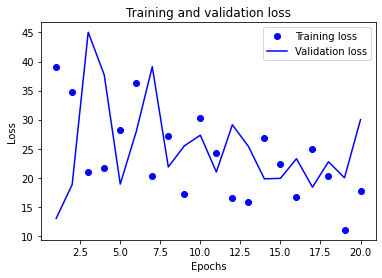

In [28]:
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')  # ‘bo’는 파란색 점을 의미합니다.
plt.plot(epochs, val_loss, 'b', label='Validation loss') # ‘b’는 파란색 실선을 의미합니다.
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

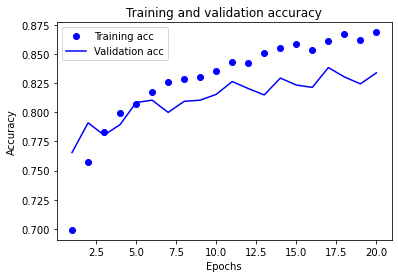

In [29]:
plt.clf() # 그래프를 초기화합니다.
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()